# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [2]:
data_df = pd.read_csv("breast-cancer-wisconsin-data.csv")


In [3]:
data_df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [4]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [5]:
data_df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [6]:
data_df.shape

(699, 11)

In [7]:
data_df.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [8]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [9]:
data_df['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [10]:
data_df.isnull().values.any()   # no missing values

False

In [11]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [12]:
data_df['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [13]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [14]:
#here, we would impute "?" with the value with maximum occurence

In [15]:
mode = data_df['Bare Nuclei'].mode()[0]
mode

'1'

In [16]:
md = data_df['Bare Nuclei'].mode()[0]
data_df['Bare Nuclei'] = data_df['Bare Nuclei'].replace('?', np.nan)
data_df['Bare Nuclei'] = data_df['Bare Nuclei'].fillna(md)

In [17]:
data_df['Bare Nuclei'].value_counts()

1     418
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [18]:
#we can see that 1 is occuring twice, which could be because the types are different for both these occurencences
#so we will change the type to int64

In [19]:
data_df['Bare Nuclei'] = data_df['Bare Nuclei'].astype('int64')

In [20]:
data_df.dtypes

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

In [21]:
#checking for duplicated data
dupes = data_df.duplicated()
sum(dupes)

9

In [22]:
data_df =data_df.drop_duplicates()

In [23]:
data_df.shape

(690, 11)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [24]:
# Check for correlation of variable


In [25]:
data_df.corr(method='pearson')

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.059592,-0.043856,-0.042803,-0.066771,-0.048102,-0.091832,-0.059802,-0.054517,-0.036286,-0.080084
ClumpThickness,-0.059592,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196,0.716812
Cell Size,-0.043856,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918,0.817586
Cell Shape,-0.042803,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435,0.817551
Marginal Adhesion,-0.066771,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008,0.701175
Single Epithelial Cell Size,-0.048102,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517,0.681063
Bare Nuclei,-0.091832,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823,0.816655
Normal Nucleoli,-0.059802,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769,0.756736
Bland Chromatin,-0.054517,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490,0.715363
Mitoses,-0.036286,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000,0.423947


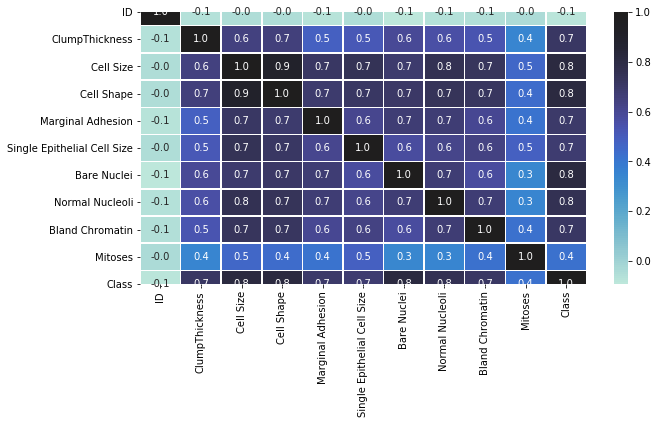

In [26]:
plt.figure(figsize=(10,5))
sns.heatmap(data_df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

In [27]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [28]:
#Let us check for pair plots

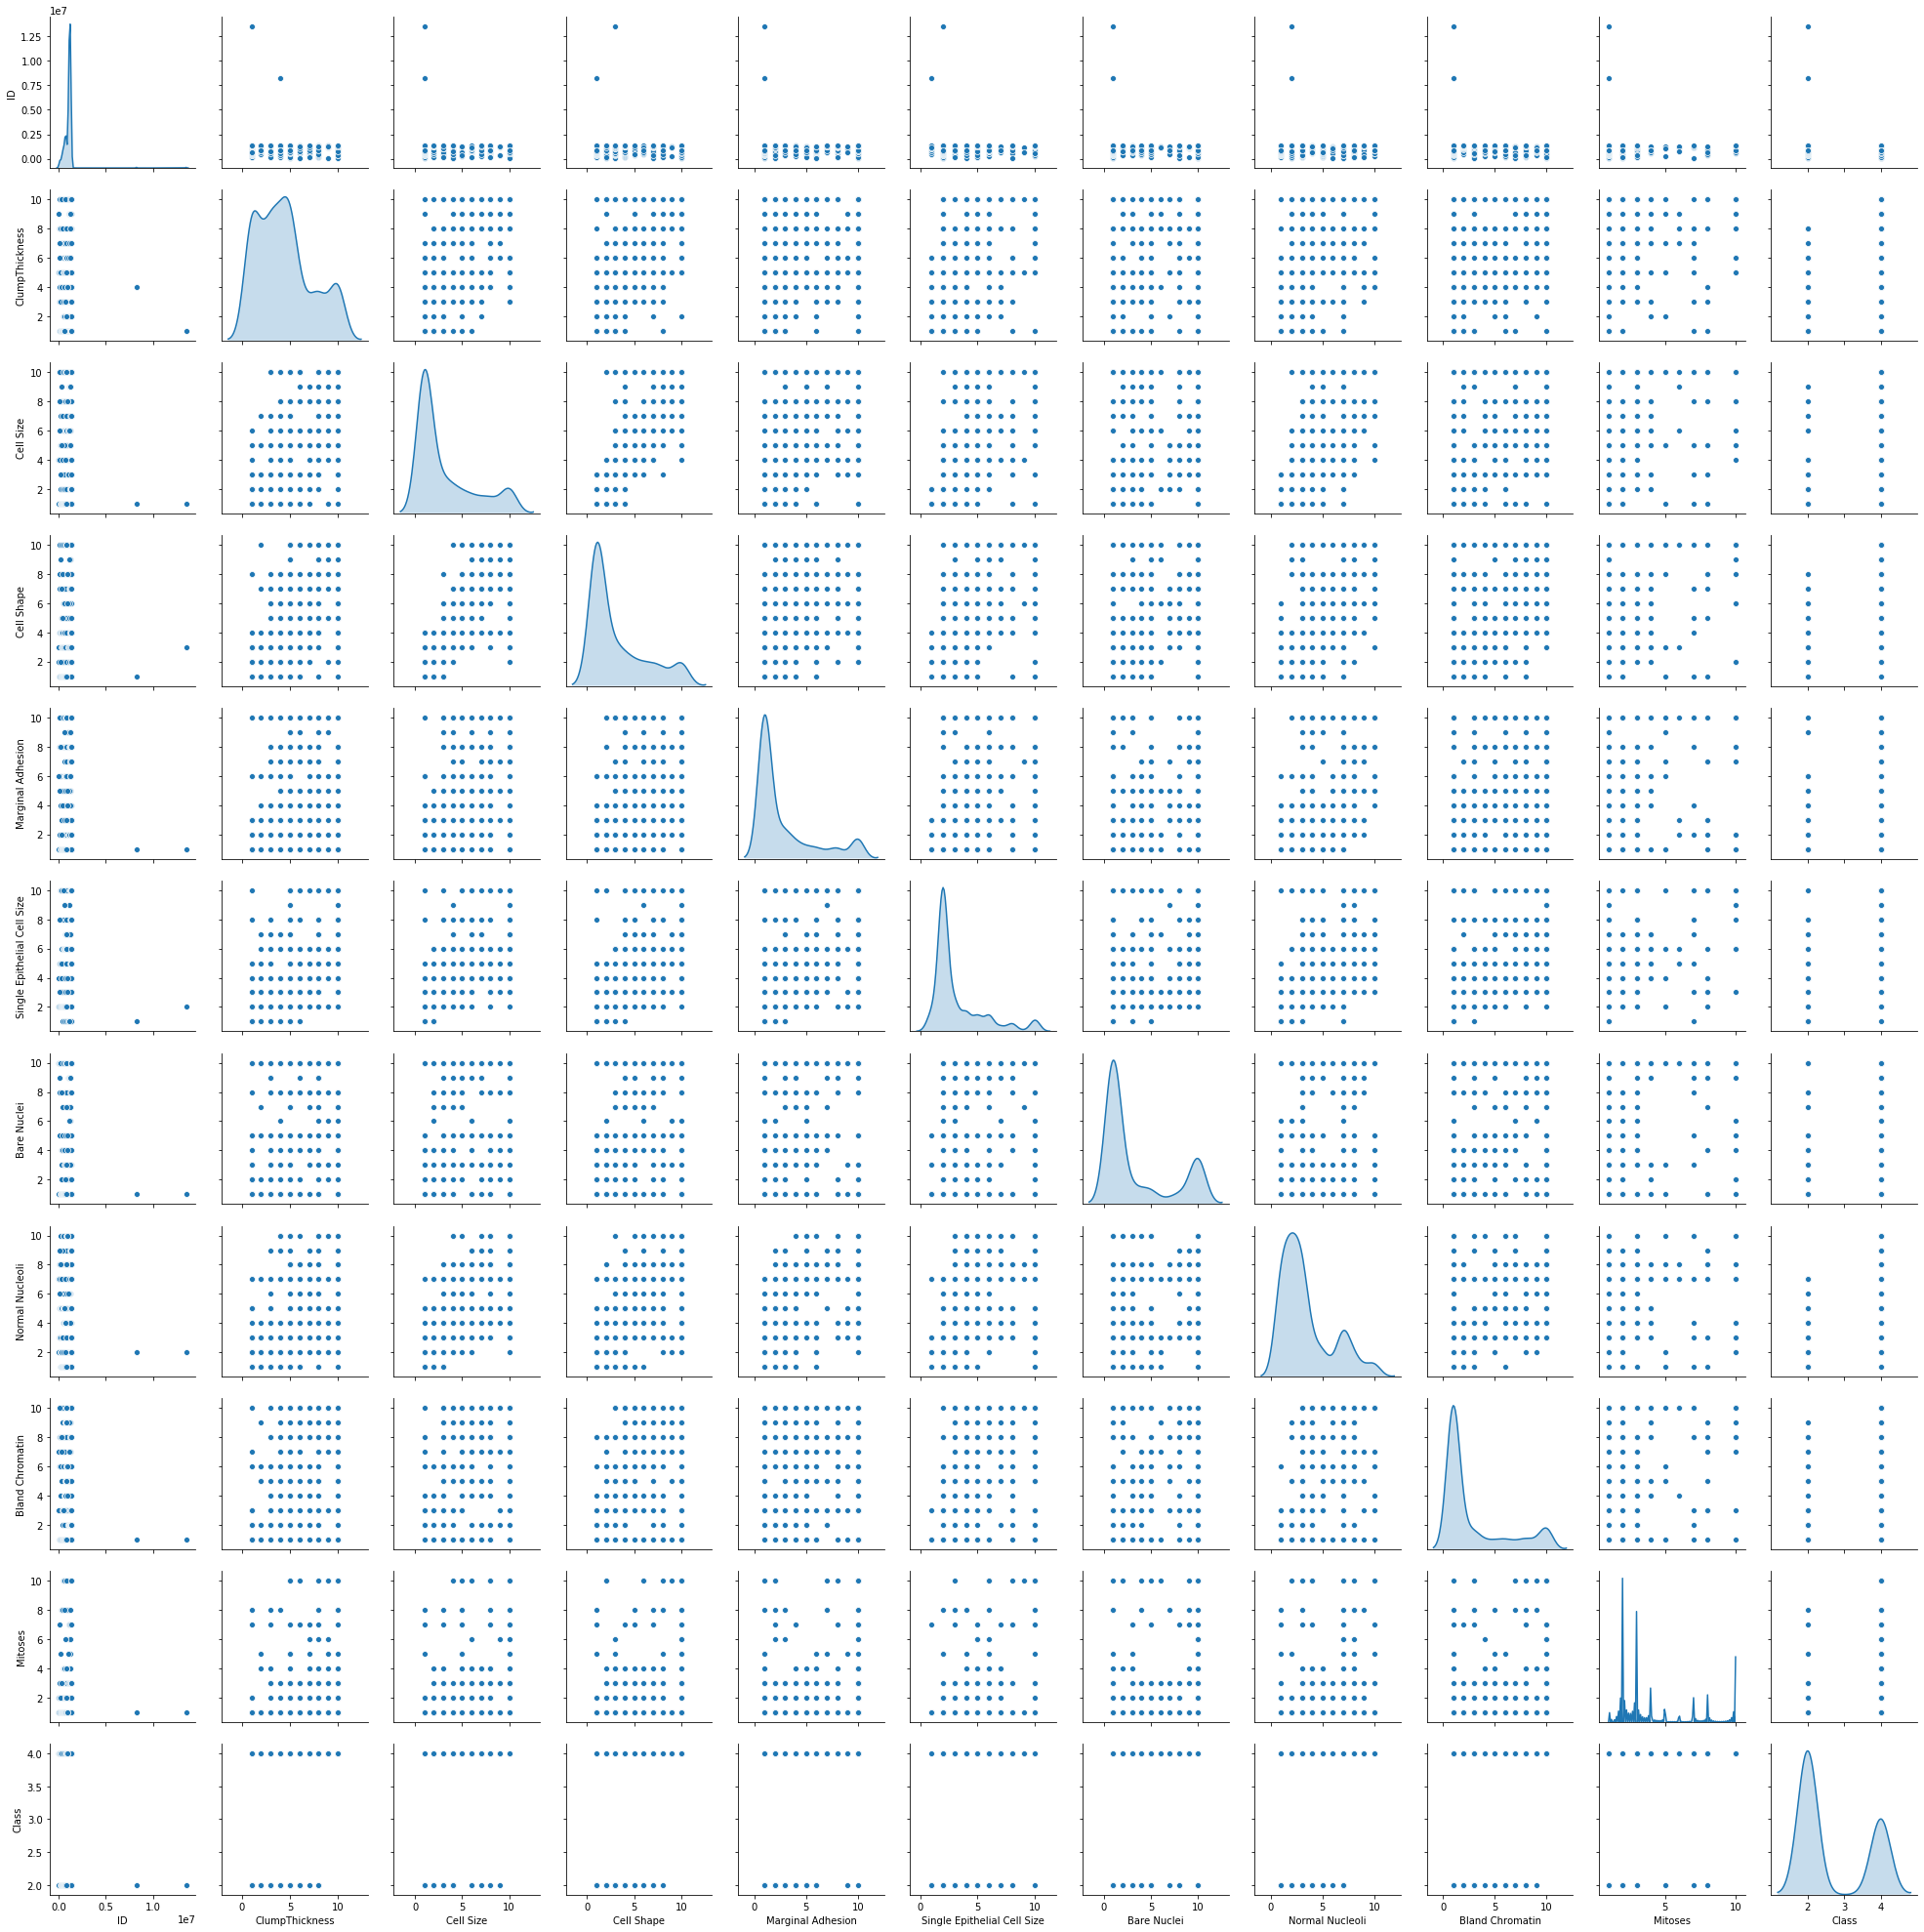

In [29]:
sns.pairplot(data_df, diag_kind="kde")  # plots scatter plots for every pair of attributes and histograms along the diagonal
plt.show()

In [30]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

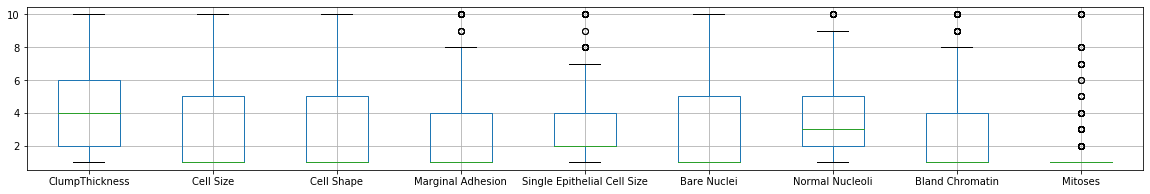

In [31]:
data_df.boxplot(figsize=(20,3),column = ['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli','Bland Chromatin', 'Mitoses'] )

In [32]:
#we can impute the outliers with the values so that the outliers lie within the range of +/- 1.5(IQR)

In [33]:
data_df['Marginal Adhesion']=np.where(data_df['Marginal Adhesion']>8, 8, data_df['Marginal Adhesion'] )

In [34]:
data_df['Single Epithelial Cell Size']=np.where(data_df['Single Epithelial Cell Size']>7, 7, data_df['Single Epithelial Cell Size'] )

In [35]:
data_df['Normal Nucleoli']=np.where(data_df['Normal Nucleoli']>9, 9, data_df['Normal Nucleoli'] )

In [36]:
data_df['Bland Chromatin']=np.where(data_df['Bland Chromatin']>8, 8, data_df['Bland Chromatin'] )

In [37]:
data_df['Mitoses']=np.where(data_df['Mitoses']>1, 1, data_df['Mitoses'] )

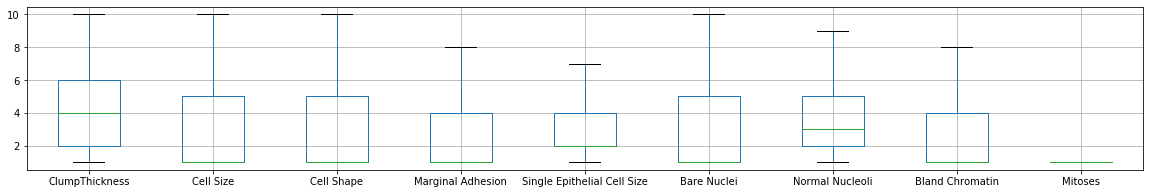

In [38]:
data_df.boxplot(figsize=(20,3),column = ['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli','Bland Chromatin', 'Mitoses'] )

In [39]:
# We could see most of the outliers are now removed.

In [40]:
X = data_df.drop(['ID','Class'], axis =1)

X.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
sc = StandardScaler()
X_std =  sc.fit_transform(X) 
column = ['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli','Bland Chromatin', 'Mitoses']
X_std =pd.DataFrame(X_std, columns=column)
X_std.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.202823,-0.701698,-0.745040,-0.670586,-0.592579,-0.686858,-0.171903,-0.640067,0.0
1,0.202823,0.285065,0.268920,0.944437,2.235080,1.803153,-0.171903,-0.260320,0.0
2,-0.507572,-0.701698,-0.745040,-0.670586,-0.592579,-0.410190,-0.171903,-0.640067,0.0
3,0.558020,1.600748,1.620866,-0.670586,-0.027047,0.143146,-0.171903,1.638417,0.0
4,-0.152375,-0.701698,-0.745040,0.136926,-0.592579,-0.686858,-0.171903,-0.640067,0.0


# Q6 Create a covariance matrix for identifying Principal components

In [43]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n', cov_matrix)

Covariance Matrix 
 [[1.00145138 0.64410677 0.65453792 0.50566766 0.54660373 0.59150555
  0.56762194 0.54895554 0.        ]
 [0.64410677 1.00145138 0.9066632  0.73190433 0.78174972 0.68556472
  0.76060761 0.7322064  0.        ]
 [0.65453792 0.9066632  1.00145138 0.70664526 0.75160088 0.70518656
  0.73975369 0.72768806 0.        ]
 [0.50566766 0.73190433 0.70664526 1.00145138 0.66784054 0.68919517
  0.68896322 0.6334195  0.        ]
 [0.54660373 0.78174972 0.75160088 0.66784054 1.00145138 0.6263289
  0.66056222 0.68990315 0.        ]
 [0.59150555 0.68556472 0.70518656 0.68919517 0.6263289  1.00145138
  0.68161737 0.60106392 0.        ]
 [0.56762194 0.76060761 0.73975369 0.68896322 0.66056222 0.68161737
  1.00145138 0.6803516  0.        ]
 [0.54895554 0.7322064  0.72768806 0.6334195  0.68990315 0.60106392
  0.6803516  1.00145138 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]


# Q7 Identify eigen values and eigen vector

In [44]:
# Step 2- Get eigen values and eigen vector

In [45]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.30799679 -0.88855863 -0.00115266  0.05182637  0.19731942 -0.26631535
  -0.02340462  0.05007625  0.        ]
 [ 0.38632446  0.04486697 -0.73943418  0.19756566 -0.34955138  0.03868533
  -0.20289405 -0.31320367  0.        ]
 [ 0.38305998 -0.02112671  0.65853186  0.16859924 -0.52512896  0.11953191
  -0.17281745 -0.26611016  0.        ]
 [ 0.34656129  0.33312259  0.05684034 -0.42387996  0.03652014 -0.73667336
  -0.19357909  0.06727064  0.        ]
 [ 0.35338061  0.21633291  0.07824581  0.3339381   0.57169387  0.26208414
  -0.51592101  0.22133388  0.        ]
 [ 0.34279211 -0.08446144 -0.0792238  -0.6516513  -0.14992364  0.51277586
   0.03050267  0.39760207  0.        ]
 [ 0.35647419  0.12116092  0.05896917 -0.15516848  0.44187298  0.14884046
   0.51600916 -0.58908479  0.        ]
 [ 0.34582304  0.16858195 -0.02155318  0.43582173 -0.13123266 -0.12970504
   0.59797754  0.51957568  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.       

# Q8 Find variance and cumulative variance by each eigen vector

In [46]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 71.78603898  78.48270738  84.12158678  88.34908082  92.15324148
  95.72508426  98.87484419 100.         100.        ]


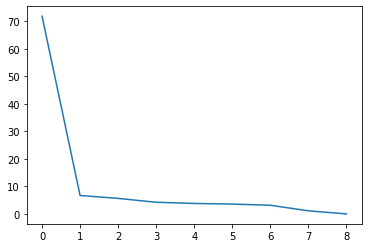

In [47]:
plt.plot(var_exp)

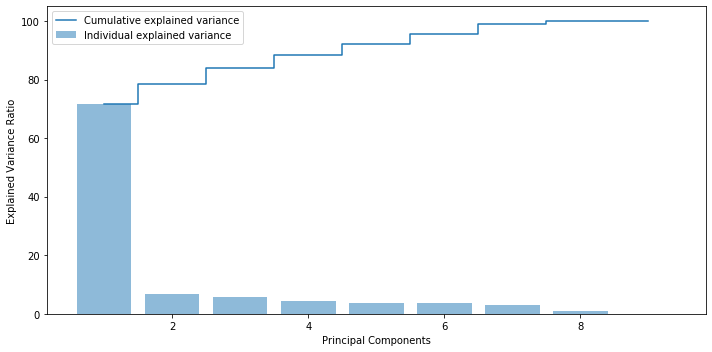

In [48]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [49]:
#we can observe that 90% of variation can be explained by having 5 components only. but to be on a safer side,
#we will take number of components as 7

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [50]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 7 PCA dimensions (dimensionality reduction from 9 to 7)

pca = PCA(n_components=7)
data_reduced = pca.fit_transform(X_std)
data_reduced.transpose()

array([[-1.45389231,  1.85955123, -1.57785207, ...,  3.99536572,
         2.43714359,  2.86804471],
       [-0.61826293,  0.40801342, -0.01040327, ...,  0.98811752,
         0.84764399,  0.93880135],
       [ 0.02794098, -0.80358543, -0.1891672 , ...,  2.19806797,
         0.31840765, -0.06121041],
       ...,
       [ 0.25246907, -1.09048969,  0.17803926, ...,  0.95107037,
         1.40984635,  1.72200858],
       [-0.1262897 ,  0.81198662,  0.20476796, ...,  0.75113012,
         0.07157728,  0.24353733],
       [-0.42429347, -0.79929917, -0.24263972, ...,  0.06102252,
         0.22500314,  0.18372843]])

In [51]:
pca.components_

array([[ 0.30799679,  0.38632446,  0.38305998,  0.34656129,  0.35338061,
         0.34279211,  0.35647419,  0.34582304, -0.        ],
       [-0.88855863,  0.04486697, -0.02112671,  0.33312259,  0.21633291,
        -0.08446144,  0.12116092,  0.16858195,  0.        ],
       [ 0.05182637,  0.19756566,  0.16859924, -0.42387996,  0.3339381 ,
        -0.6516513 , -0.15516848,  0.43582173,  0.        ],
       [ 0.02340462,  0.20289405,  0.17281745,  0.19357909,  0.51592101,
        -0.03050267, -0.51600916, -0.59797754, -0.        ],
       [-0.05007625,  0.31320367,  0.26611016, -0.06727064, -0.22133388,
        -0.39760207,  0.58908479, -0.51957568,  0.        ],
       [-0.26631535,  0.03868533,  0.11953191, -0.73667336,  0.26208414,
         0.51277586,  0.14884046, -0.12970504,  0.        ],
       [-0.19731942,  0.34955138,  0.52512896, -0.03652014, -0.57169387,
         0.14992364, -0.44187298,  0.13123266, -0.        ]])

# Q10 Find correlation between components and features

In [52]:
df_comp = pd.DataFrame(pca.components_,columns=list(X_std))
df_comp.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.307997,0.386324,0.383060,0.346561,0.353381,0.342792,0.356474,0.345823,-0.0
1,-0.888559,0.044867,-0.021127,0.333123,0.216333,-0.084461,0.121161,0.168582,0.0
2,0.051826,0.197566,0.168599,-0.423880,0.333938,-0.651651,-0.155168,0.435822,0.0
3,0.023405,0.202894,0.172817,0.193579,0.515921,-0.030503,-0.516009,-0.597978,-0.0
4,-0.050076,0.313204,0.266110,-0.067271,-0.221334,-0.397602,0.589085,-0.519576,0.0


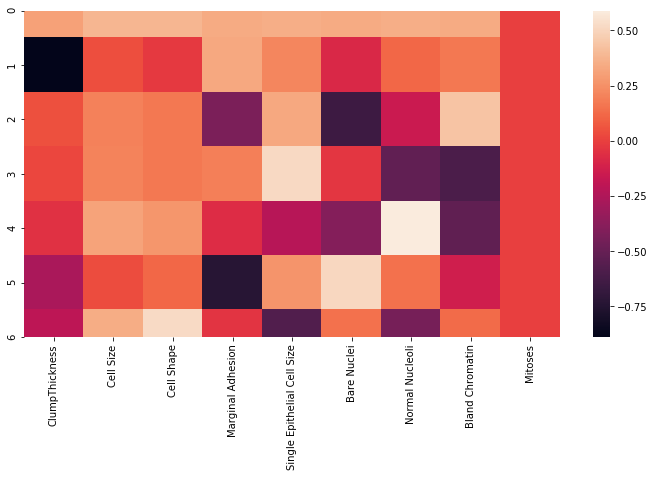

In [53]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp)

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [54]:
jokes_df = pd.read_csv("jokes.csv")

# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [55]:
ratings = jokes_df.iloc[:200, 1:]
ratings.shape

(200, 100)

# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [56]:
ratings = ratings.replace(99.00, 0)
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [57]:
ratings_diff = ratings.mean()
ratings_diff

Joke1      0.53005
Joke2      0.59390
Joke3      0.23765
Joke4     -0.70100
Joke5     -0.03790
            ...   
Joke96     0.41755
Joke97     0.75500
Joke98     0.09370
Joke99     0.13500
Joke100    0.52440
Length: 100, dtype: float64

In [58]:
ratings_diff.sort_values(ascending=False).head(10)

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
dtype: float64